In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

<font size="3">
Za početak ćemo predstaviti zadani skup podataka. Datoteka imena "wdbc.data" sadrži podatke dimenzija 569×32 i prikazuje određeni broj žena kojima je dijagnosticiran rak dojke te je li rak proglašen malignim ili benignim.
</font>
<br><br>
<font size="2">
    Prije nego što počnemo sa bilokakvim dijelovima koda, napomenuo bih da sam u "wdbc.data" datoteci umetnuo jedan redak
    skroz na početku datoteke. "id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,<br>concave.points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,
<br>compactness_se,concavity_se,concave.points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,
<br>perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,
<br>fractal_dimension_worst"<br>
    Razlog tomu je što će stupci biti imenovani, prilikom ovakvog načina importanja datoteke.
</font>

In [2]:
data = pd.read_csv("wdbc.data")
print(data.shape)
print(data.head())
print("____________________________________________________________________________________________________________")

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave.points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

<font size="3">
    Stupce možemo predstaviti kao 3 grupe:
    <br>&nbsp&nbsp&nbsp- prvi stupac - identifikator osobe
    <br>&nbsp&nbsp&nbsp- drugi stupac - dijagnoza je li tip raka maligni ili benigni
    <br>&nbsp&nbsp&nbsp- ostali stupci - razne kalkulacije nad veličinama i oblicima ciljanih jezgri stanica raka
</font>

<font size=2>
    Ukoliko budemo radili određene predikcije pomoću ovih podataka: 
    <br>&nbsp&nbsp&nbsp- stupac sa dijagnozom možemo izdvojiti u posebno polje da predstavlja skup oznaka 
    <br>&nbsp&nbsp&nbsp&nbsp&nbsp(naravno prebaciti npr. M oznaku u jedinicu a B oznaku u nulu)
    <br>&nbsp&nbsp&nbsp- stupac sa identifikatorima možemo potpuno izbaciti
    <br>&nbsp&nbsp&nbsp- ostali stupci bi nam predstavljali X skup podataka.
</font>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave.points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<font size=3>
    Stupci mjerenja su u float tipu, identifikator u integer tipu i dijagnoza je tipa object.
    Nijedan stupac ne sadrži nepostojeće vrijednosti.
</font>

In [4]:
M = (data.diagnosis == 'M').sum()
B = (data.diagnosis == 'B').sum()
print('U datasetu brojimo ukupno {} malignih i {} benignih primjeraka.'.format(M,B))

U datasetu brojimo ukupno 212 malignih i 357 benignih primjeraka.


Kako bismo dijagnozu raka koristili u narednim statistikama, pretvorit ćemo ih u nule i jedinice.
<br>Provjerimo informacije o datasetu i sadrži li neke stršeće vrijednosti.

In [5]:
data.rename(columns={"fractal_dimension_mean": "fr_dim_mean"})
data = data.replace(to_replace="M",value="1").replace(to_replace="B",value="0")
data["diagnosis"] = data["diagnosis"].apply(pd.to_numeric)
data[["radius_mean","texture_mean", "perimeter_mean","area_mean", "smoothness_mean","compactness_mean",
      "concavity_mean", "concave.points_mean", "symmetry_mean", "fractal_dimension_mean"]].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [6]:
data[["radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se",
      "concavity_se","concave.points_se", "symmetry_se","fractal_dimension_se"]].describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave.points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


In [7]:
data[["radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst",
      "concavity_worst","concave.points_worst", "symmetry_worst","fractal_dimension_worst"]].describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Ako bismo pretpostavili da medijan treba biti otprilike jednako udaljen od minimuma i maksimuma, gotovo svaki stupac ima poprilično veću razliku do maksimuma nego minimuma. Tu možemo posumnjati na stršeće vrijednosti. U svim tablicama za potencijalne stršeće vrijednosti mogli bismo izdvojiti gotovo sve stupce, ali ponajviše u oči upadaju stupci "area_mean", "perimeter_se", "area_se", "area_worst". Kako vidimo da se "area" stupci uglavnom ponavljaju, analizirat ćemo njih.

Text(0, 0.5, 'scale')

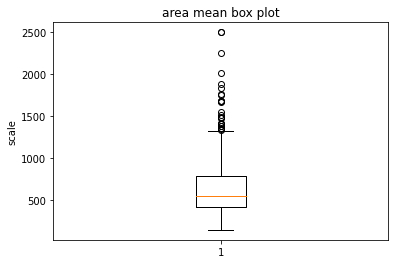

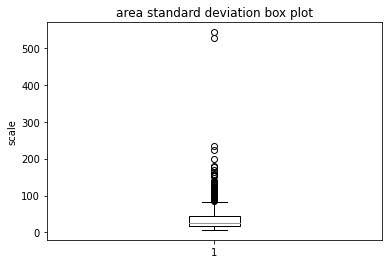

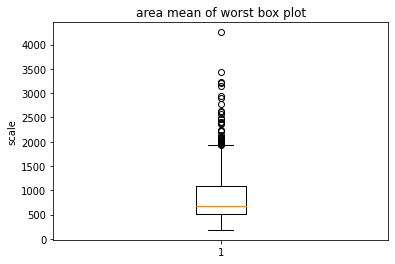

In [8]:
plt.figure()
plt.boxplot(data[["area_mean"]])
plt.title("area mean box plot")
plt.ylabel("scale")
plt.figure()
plt.boxplot(data[ "area_se"])
plt.title("area standard deviation box plot")
plt.ylabel("scale")
plt.figure()
plt.boxplot(data[ "area_worst"])
plt.title("area mean of worst box plot")
plt.ylabel("scale")

Iako na svim grafovima neke vrijednosti uveliko odskaču, upečatljiva dva primjerka na drugom grafu i jedan na trećem gotovo sigurno predstavljaju stršeće vrijednosti. 
<br>
Ne mora značiti da su sve stršeće vrijednosti netočne, možda se jednostavno jako razlikuju od ostatka populacije. Tu u obzir treba uzeti što se misli pod pojmom "area" u kontekstu veličine i oblika ciljanih jezgri stanica raka.

In [9]:
print('area_mean > 2000:', (data.area_mean > 2000).sum())
print('area_se > 300:', (data.area_se > 300).sum())
print('area_worst > 2000:', (data.area_worst > 2000).sum())

area_mean > 2000: 4
area_se > 300: 2
area_worst > 2000: 30


Ovaj graf pokazuje skalu vrijednosti area_se za sve osobe, ako bi se poredala uzlazno.


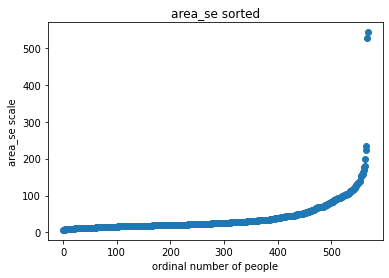

In [10]:
plt.figure(figsize=(6,4))
xy = []
for i in range(569):
    xy.append(i)
plt.scatter(xy, data.area_se.sort_values())
plt.title("area_se sorted")
plt.xlabel("ordinal number of people")
plt.ylabel("area_se scale")

print("Ovaj graf pokazuje skalu vrijednosti area_se za sve osobe, ako bi se poredala uzlazno.")

Text(0.5, 0, 'vrijednosti symmetry_mean')

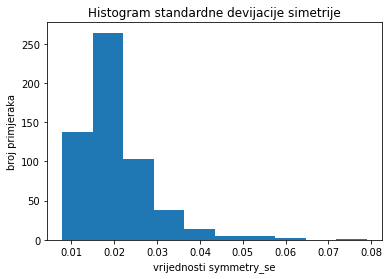

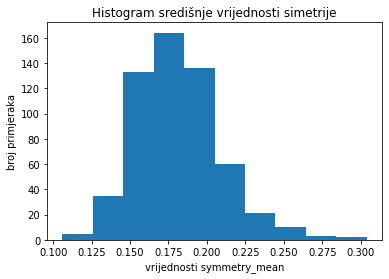

In [11]:
plt.figure(figsize=(6,4))
plt.hist(data.symmetry_se, )
plt.title("Histogram standardne devijacije simetrije")
plt.ylabel("broj primjeraka")
plt.xlabel("vrijednosti symmetry_se")
plt.show
plt.figure(figsize=(6,4))
plt.hist(data.symmetry_mean)
plt.title("Histogram središnje vrijednosti simetrije")
plt.ylabel("broj primjeraka")
plt.xlabel("vrijednosti symmetry_mean")

Hisogrami pokazuju koliko primjeraka ima određenu vrijednost za symmetry_se odnosno symmetry_mean. <br>Za symmetry_se oko 250 primjeraka ima vrijednost ~0.02.

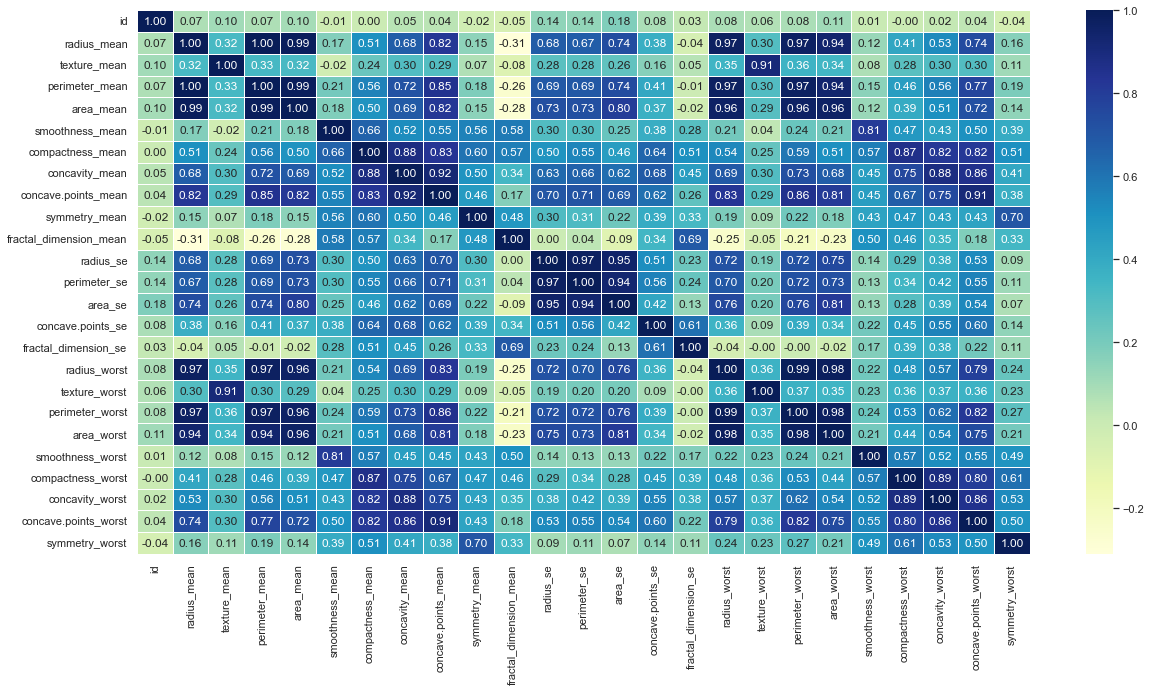

In [12]:
sns.set(rc={'figure.figsize':(20,10)})
X_numeric = data.loc[:,~data.columns.isin(["symmetry_se", "concave_points_se", "compactness_se", "fractal_dimension_worst",
                                           "concavity_se", "smoothness_se", "texture_se", "simmetry_worst",
                                          "diagnosis", "simmetry_mean",])]
sns.heatmap(X_numeric.corr(),annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

Na toplinskoj mapi se mogu očitovati korelacijski koeficijenti između svake tražene značajke međusobno. Ako između neke dvije značajke korelacijski koeficijent bude preko 0.90 onda jednu od te dvije značajke možemo smatrati redundantnom značajkom. Na gornjem grafu nisu prikazane značajke koje ostalim značajkama imaju niske korelacije.

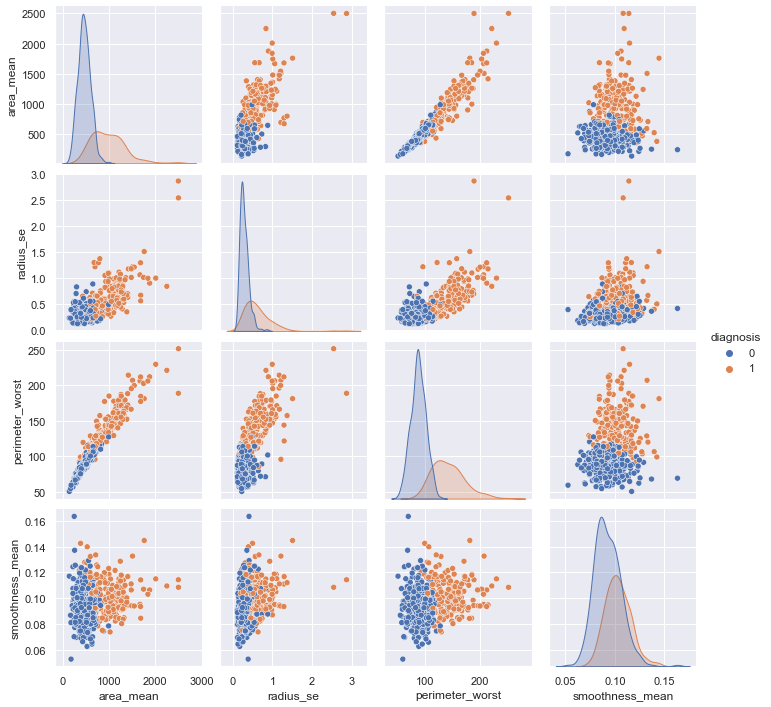

In [13]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(data.loc[:,["diagnosis","area_mean","radius_se", "perimeter_worst", "smoothness_mean"]], hue="diagnosis")
plt.show()

Matrica dijagrama raspršenja između dijagnoze, središnje vrijednosti područja, standardne devijacije radijusa, 
perimetra, središnje vrijednosti glatkoće s naglašenim dijelom gdje su dijagnoze maligne a gdje benigne.